In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown as md

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Load data

In [3]:
# Get vehicles database
url_cars = 'https://www.fueleconomy.gov/feg/epadata/vehicles.csv'
cars = pd.read_csv(url_cars, low_memory=False)

In [4]:
# Get monthly residential electricity data
elec_url = 'https://www.eia.gov/electricity/data/eia861m/xls/sales_revenue.xlsx'
us_elec = pd.read_excel(elec_url, sheet_name='US-YTD', usecols='A:C, G', 
                            skiprows=2, skipfooter=1)

# Price in Cents/kWh
us_elec = us_elec.rename(columns={'Cents/kWh': 'price'})

# Remove yearly average
us_elec = us_elec[us_elec['MONTH'] != '.']

# Change date information into Datetime
us_elec['day'] = '1'
us_elec['period'] = pd.to_datetime(us_elec[['Year', 'MONTH', 'day']])
us_elec = us_elec.drop(['Year', 'MONTH', 'day'], axis=1)

us_elec.sort_values(by='period', inplace=True)

In [5]:
# Get weekly residential gas prices
url_gas = 'https://www.eia.gov/petroleum/gasdiesel/xls/pswrgvwall.xls'
gas_prices = pd.read_excel(url_gas, sheet_name='Data 1', skiprows=2, parse_dates=['Date'])

# Rename columns
columns = gas_prices.columns.values.tolist()

sub1 = 'Weekly '
sub2 = ' Regular'

new_column = []
for name in columns:
    if sub1 in name:

        # get index of substrings
        idx1 = name.index(sub1)
        idx2 = name.index(sub2)

        new_name = name[idx1 + len(sub1): idx2]
        new_column += [new_name]
        
    else:
        new_column += [name]

column_dict = dict(zip(columns, new_column))

gas_prices = gas_prices.rename(columns=column_dict)

## Select cars to compare

In [6]:
# Get unique years and makes from the cars database
years = sorted(cars['year'].unique())
makes = cars['make'].str.lower().unique()

In [7]:
def select_car(year, make, model=None):
    '''Function to return simplified list of vehicles to choose from for further analsis.
    
    Args:
        year (int): car model year
        make (str): car make
        model (str, optional): string containing part of the car model name
        
    Returns:
        DataFrame containing all possible car matches with information to help user select the 
        the best match for their car
    '''
    
    if year not in years:
        print(f'{year} not in database')
        
    if make.lower() not in makes:
        print(f'{make} not in database')
    
    temp = pd.DataFrame()
    temp = cars[cars['year'] == year]
    temp = temp[temp['make'].str.lower() == make.lower()]
    temp = temp[temp['model'].str.lower().str.contains(model.lower())]

    # Return simplified DataFrame with relevant information
    if (temp['fuelType'] == 'Electricity').all():
        return temp[['model', 'fuelType', 'drive', 'rangeCity', 'rangeHwy', 'evMotor']]
    elif (temp['fuelType'] == 'Electricity').any():
        return temp[['model', 'fuelType', 'drive', 'cylinders', 'displ', 'trany', 'city08', 'highway08', 
                     'evMotor', 'rangeCity', 'rangeHwy']]
    elif (temp['atvType'] == 'Plug-in Hybrid').any():
        return temp[['model', 'fuelType', 'atvType', 'drive', 'cylinders', 'displ', 'trany', 
                     'evMotor', 'rangeCity', 'rangeHwy']]
    else:
        return temp[['model', 'fuelType', 'cylinders', 'displ', 'trany', 'drive']]

In [8]:
# Search for 2022 Ford F-150 models
select_car(2022, 'Ford', '150')

,model,fuelType,drive,cylinders,displ,trany,city08,highway08,evMotor,rangeCity,rangeHwy
38307,F150 Pickup 2WD,Regular,Rear-Wheel Drive,6.0,2.7,Automatic (S10),20,26,NaN,0.0,0.0
38308,F150 Pickup 2WD FFV,Gasoline or E85,Rear-Wheel Drive,6.0,3.3,Automatic (S10),19,24,NaN,0.0,0.0
38309,F150 Pickup 2WD,Regular,Rear-Wheel Drive,6.0,3.5,Automatic (S10),18,24,NaN,0.0,0.0
38310,F150 Pickup 2WD FFV,Gasoline or E85,Rear-Wheel Drive,8.0,5.0,Automatic (S10),17,24,NaN,0.0,0.0
38311,F150 Pickup 2WD,Regular,Rear-Wheel Drive,6.0,3.5,Automatic (S10),17,24,NaN,0.0,0.0
38313,F150 Pickup 2WD FFV,Gasoline or E85,Rear-Wheel Drive,8.0,5.0,Automatic (S10),17,24,NaN,0.0,0.0
38314,F150 Pickup 4WD,Regular,Part-time 4-Wheel Drive,6.0,2.7,Automatic (S10),19,24,NaN,0.0,0.0
38315,F150 Pickup 4WD FFV,Gasoline or E85,Part-time 4-Wheel Drive,6.0,3.3,Automatic (S10),19,22,NaN,0.0,0.0
38316,F150 Pickup 4WD,Regular,Part-time 4-Wheel Drive,6.0,3.5,Automatic (S10),18,23,NaN,0.0,0.0
38317,F150 Pickup 4WD FFV,Gasoline or E85,Part-time 4-Wheel Drive,8.0,5.0,Automatic (S10),16,22,NaN,0.0,0.0


### Ford F-150 prices from Ford website on August 26, 2022
F-150 Lightning standard range, XLT (38808) MSRP: $61769

F-150 XLT, 4x4 3.5 L ICE (38316) MSRP: $57645

F-150 XLT, 4x4, Hybrid (38391) MSRP: $59405

In [9]:
# Dataframe of F-150 prices
msrp = pd.DataFrame({'price':[61769, 57645, 59405]},
                    index=['F-150 Lightning', 'F-150', 'F-150 Hybrid'])

In [10]:
# Select cars from the cars database using their index values
car1 = 38316
car2 = 38391
car3 = 38808

car1 = cars.iloc[car1]
car2 = cars.iloc[car2]
car3 = cars.iloc[car3]

# Get vehicle names
car1_name = str(car1['year']) + ' ' + car1['make'] + ' ' + car1['model']
car2_name = str(car2['year']) + ' ' + car2['make'] + ' ' + car2['model']
car3_name = str(car3['year']) + ' ' + car3['make'] + ' ' + car3['model']

print(f'car1: {car1_name}')
print(f'car2: {car2_name}')
print(f'car3: {car3_name}')

car1: 2022 Ford F150 Pickup 4WD
car2: 2022 Ford F150 Pickup 4WD HEV
car3: 2022 Ford F-150 Lightning 4WD


In [11]:
# Separate different vehicle types for plotting
ev = cars[cars['fuelType1'] == 'Electricity']
ice = cars[(cars['fuelType1'] != 'Electricity') & (cars['fuelType2'] != 'Electricity') & \
           (cars['atvType'] != 'Hybrid')]
phev = cars[cars['atvType'] == 'Plug-in Hybrid']
hybrids = cars[cars['atvType'] == 'Hybrid']

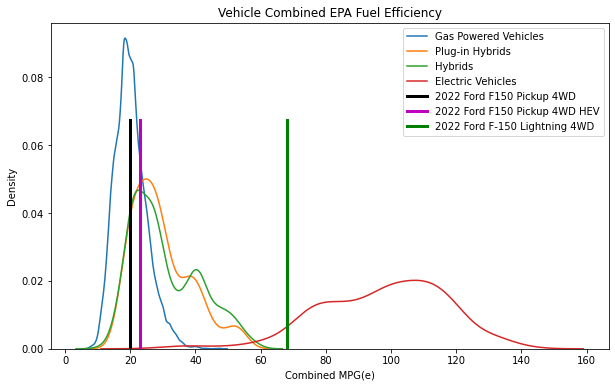

In [12]:
# Plot to compare EPA estimated fuel efficiency of selected cars with entire cars database
plt.subplots(figsize=(10, 6))
sns.kdeplot(x='comb08', data=ice)
sns.kdeplot(x='comb08', data=phev)
sns.kdeplot(x='comb08', data=hybrids)
sns.kdeplot(x='comb08', data=ev)
plt.axvline(car1['comb08'], 0, 0.7, c='k', linewidth=3)
plt.axvline(car2['comb08'], 0, 0.7, c='m', linewidth=3)
plt.axvline(car3['comb08'], 0, 0.7, c='g', linewidth=3)
plt.legend(['Gas Powered Vehicles', 'Plug-in Hybrids', 'Hybrids', 'Electric Vehicles',
            car1_name, car2_name, car3_name], loc='upper right')
plt.title('Vehicle Combined EPA Fuel Efficiency')
plt.xlabel('Combined MPG(e)');

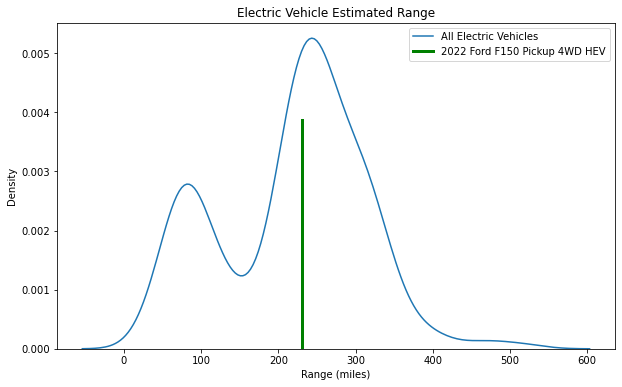

In [13]:
# Plot to compare EV range of F-150 Lightning and all EVs in the cars database
plt.subplots(figsize=(10, 6))
sns.kdeplot(x='range', data=ev)
plt.axvline(car3['range'], 0, 0.7, c='g', linewidth=3)
plt.legend(['All Electric Vehicles', car2_name], loc='upper right')
plt.title('Electric Vehicle Estimated Range')
plt.xlabel('Range (miles)');

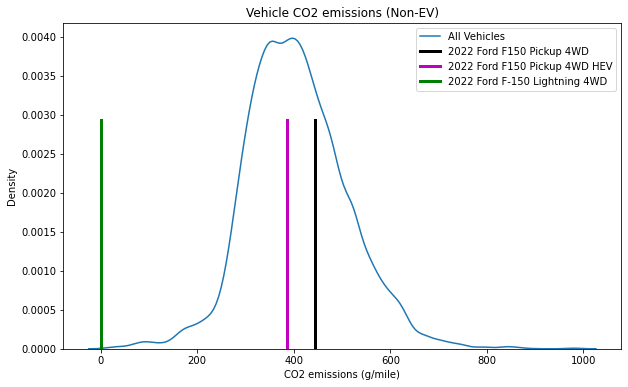

In [14]:
# Plot to compare the estimated CO2 emissions of selected cars with entire cars database
plt.subplots(figsize=(10, 6))
sns.kdeplot(x='co2', data=cars[cars['co2'] > 0])
plt.axvline(car1['co2'], 0, 0.7, c='k', linewidth=3)
plt.axvline(car2['co2'], 0, 0.7, c='m', linewidth=3)
plt.axvline(car3['co2'], 0, 0.7, c='g', linewidth=3)
plt.legend(['All Vehicles', car1_name, car2_name, car3_name], loc='upper right')
plt.title('Vehicle CO2 emissions (Non-EV)')
plt.xlabel('CO2 emissions (g/mile)');

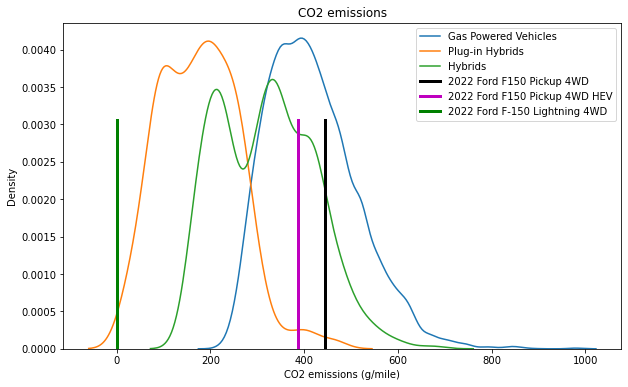

In [15]:
# Plot to compare the estimated CO2 emissions of selected cars with entire cars database by vehicle type
plt.subplots(figsize=(10, 6))
sns.kdeplot(x='co2', data=ice[ice['co2'] > 0])
sns.kdeplot(x='co2', data=phev)
sns.kdeplot(x='co2', data=hybrids[hybrids['co2'] > 0])
plt.axvline(car1['co2'], 0, 0.7, c='k', linewidth=3)
plt.axvline(car2['co2'], 0, 0.7, c='m', linewidth=3)
plt.axvline(car3['co2'], 0, 0.7, c='g', linewidth=3)
plt.legend(['Gas Powered Vehicles', 'Plug-in Hybrids', 'Hybrids', 
            car1_name, car2_name, car3_name], loc='upper right')
plt.title('CO2 emissions')
plt.xlabel('CO2 emissions (g/mile)');

In [16]:
# Resample gas prices to give the average monthly price to be the same as electricity prices
gas_prices_resample = gas_prices.resample('MS', on='Date').mean()

# US fuel and electricity prices
us_prices = pd.merge(gas_prices_resample['U.S.'], us_elec[['period', 'price']], 
                         left_on='Date', right_on='period')
us_prices = us_prices.rename(columns={'U.S.': 'gas', 'price': 'electricity'})

# Forecasts

Full forecasts can be found in the Forecasts notebook

In [17]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [19]:
# US gas and electric prices
gas_prices_resample.reset_index(inplace=True)
gas_all = gas_prices_resample[['Date', 'U.S.']]
gas_all = gas_all.set_index(pd.DatetimeIndex(gas_all['Date']))
gas_all = gas_all.drop('Date', axis=1)

electric_all = us_elec[['period', 'price']]

format = '%Y-%m-%d %H:%M:%S'

electric_all.loc['period'] = pd.to_datetime(electric_all['period'], format=format)
electric_all = electric_all.set_index(pd.DatetimeIndex(electric_all['period']).to_period('M'))
electric_all = electric_all.drop('period', axis=1)
electric_all = electric_all.dropna()

## Average US electricity price forecast

In [20]:
# Seasonal SARIMA model for US electricity prices
electric_model = SARIMAX(electric_all, order=(0,1,1), seasonal_order=(0,1,1,12), intercept=True)
electric_all_results = electric_model.fit()

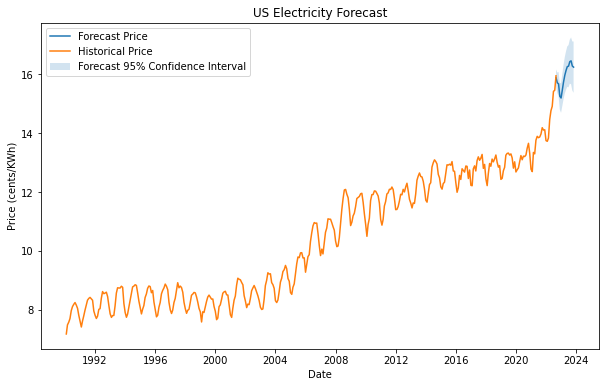

In [21]:
from dateutil.relativedelta import relativedelta

# Find date of the last electricity price and add one month to it
start_date = electric_all.index.array[-1].to_timestamp() + relativedelta(months=1)

# Forecast out 15 months
forecast_dates = pd.date_range(start=start_date, periods=15, freq='MS')
electric_all_pred = electric_all_results.get_forecast(steps=15, dynamic=True)
electric_all_pred_mean = electric_all_pred.predicted_mean
electric_all_conf = electric_all_pred.conf_int().set_index(forecast_dates)

# DataFrame of forecast results
electric_all_forecast = pd.DataFrame(electric_all_pred_mean).set_index(forecast_dates)
electric_all_forecast = pd.concat([electric_all_forecast, electric_all_conf], axis=1)
electric_all_forecast.rename({'predicted_mean': 'electricity_forecast', 
                             'lower price': 'electricity_low', 'upper price': 'electricity_high'}, 
                             axis=1, inplace=True)

# plot forecast with actual data
plt.subplots(figsize=(10,6))
plt.plot(electric_all_forecast.index, electric_all_forecast['electricity_forecast'])
plt.fill_between(electric_all_forecast.index, electric_all_forecast['electricity_low'], 
                 electric_all_forecast['electricity_high'], alpha=0.2)
plt.plot(electric_all.index, electric_all['price'])
plt.xlabel('Date')
plt.ylabel('Price (cents/KWh)')
plt.title('US Electricity Forecast')
plt.legend(['Forecast Price', 'Historical Price', 'Forecast 95% Confidence Interval'], loc='upper left');

## Gas Forecast

In [22]:
# Take the log of the US gas prices to achieve stationarity of variance
gas_log_all = np.log(gas_all)

# Non-seasonal ARIMA model for US gas prices
gas_model = SARIMAX(gas_log_all, order=(0,1,1), intercept=True, freq='MS')

gas_results = gas_model.fit()

/Users/richardbradshaw/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


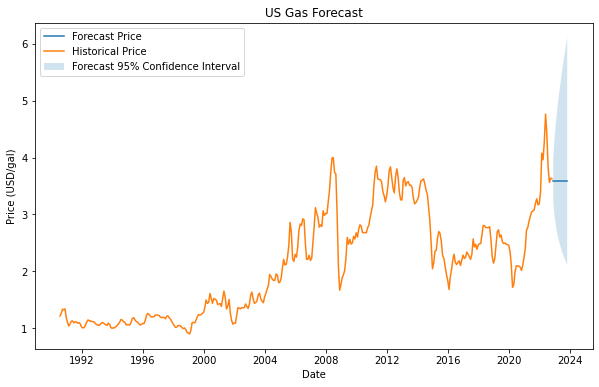

In [23]:
# Find date of the last gas price and add one month to it
start_date_gas = gas_all.index.array[-1] + relativedelta(months=1)
forecast_dates_gas = pd.date_range(start=start_date_gas, periods=12, freq='MS')

# Forecast out 12 months
gas_forecast = gas_results.get_forecast(steps=12, dynamic=True)
gas_pred = gas_forecast.predicted_mean
gas_conf = gas_forecast.conf_int()

# Convert forecast log prices back to actual prices
gas_pred = np.exp(gas_pred)
gas_conf = np.exp(gas_conf)

# DataFrame of forecast results
gas_US_forecast = pd.DataFrame(gas_pred).set_index(forecast_dates_gas)
gas_US_forecast = pd.concat([gas_US_forecast, gas_conf], axis=1)
gas_US_forecast.rename({'predicted_mean': 'gas_forecast', 
                             'lower U.S.': 'gas_low', 'upper U.S.': 'gas_high'}, 
                             axis=1, inplace=True)

# plot forecast with actual data
plt.subplots(figsize=(10,6))
plt.plot(gas_pred)
plt.fill_between(gas_conf.index, gas_conf['lower U.S.'], gas_conf['upper U.S.'], alpha=0.2)
plt.plot(gas_all)
plt.xlabel('Date')
plt.ylabel('Price (USD/gal)')
plt.title('US Gas Forecast')
plt.legend(['Forecast Price', 'Historical Price', 'Forecast 95% Confidence Interval'], loc='upper left');

In [24]:
US_forecasts = pd.merge(electric_all_forecast, gas_US_forecast, how='right', 
                        left_index=True, right_index=True).round(2)

In [25]:
def fuel_cost_forecast(fuel_price, car_in, driving_in, forecast=True, co2=True):
    '''function to calculate the forecasted fuel costs for different types of vehicles.
    
    Args:
        fuel_price (DataFrame): Timeseries DataFrame containing forecasted monthly gas prices in dollars per gallon 
                            and monthly electricity prices in cents per kWH and their confidence intervals 
                            or actual monthly electricity and gas prices if forecast=False.
        car_in (Pandas Series): series that contains all the vehicle information from the cars DataFrame for 
                            the selected car     
        driving_in (List): List that contains the weekly miles driven. 
                        [weekday highway, weekday city, weekend highway, weekend city]
        forecast (Bool, Optional): Indicate whether the fuel_price DataFrame contains 
                                forecast prices or not.
        co2 (Bool, Optional): Indicate whether or not to output CO2 emissions.
    
    Returns:
        Monthly forecasted fuel cost, forecasted fuel cost for the 95% confidence interval of fuel price forecasts,
        and CO2 emissions.
    '''
    
    # factor to multiply with weekly fuel usage to calculate monthly fuel usage
    time_multiple = 365 / 12 / 7
    
    weekday_H = driving_in[0]
    weekday_C = driving_in[1]
    weekend_H = driving_in[2]
    weekend_C = driving_in[3]
    weekday_all = weekday_H + weekday_C
    weekend_all = weekend_H + weekend_C

    # EV fuel cost
    if car_in['fuelType1'] == 'Electricity':
        
        # EV electricity consumption in kWh/mile 
        highway_E = car_in['highwayE'] / 100
        city_E = car_in['cityE'] / 100

        # Combined EV fuel efficiency for weekdays and weekends
        combined_weekday_kW_mile = ((weekday_C / weekday_all) * city_E) + ((weekday_H / weekday_all) * highway_E)
        combined_weekend_kW_mile = ((weekend_C / weekend_all) * city_E) + ((weekend_H / weekend_all) * highway_E)

        # daily fuel usage for weekdays and weekends
        # miles driven per day * kWh per mile
        weekday_daily_fuel_usage = weekday_all * combined_weekday_kW_mile
        weekend_daily_fuel_usage = weekend_all * combined_weekend_kW_mile
        
        interval_fuel_usage = ((weekday_daily_fuel_usage * 5) + (weekend_daily_fuel_usage * 2)) * time_multiple
        
        if forecast:
            # total interval fual cost in dollars
            total_interval_fuel_cost = interval_fuel_usage * fuel_price['electricity_forecast'] / 100
            total_interval_fuel_cost_low = interval_fuel_usage * fuel_price['electricity_low'] / 100
            total_interval_fuel_cost_high = interval_fuel_usage * fuel_price['electricity_high'] / 100
        else:
            total_interval_fuel_cost = interval_fuel_usage * fuel_price['electricity'] / 100
        
        # total interval CO2 emissions in kg
        interval_co2 = ((weekday_all * 5) + (weekend_all * 2)) * time_multiple * car_in['co2TailpipeGpm'] / 1000
        
    # Plug-in Hybrid fuel cost
    elif car_in['atvType'] == 'Plug-in Hybrid':
        
        # Electricity consumption in kWh/mile 
        highway_E = car_in['highwayE'] / 100
        city_E = car_in['cityE'] / 100

        # Fuel efficiency in MPG
        highwayMPG = car_in['highway08U']
        cityMPG = car_in['city08U']

        # Electricity range
        highway_range = car_in['rangeHwyA']
        city_range = car_in['rangeCityA']

        effective_city_range_weekday = (weekday_C / weekday_all) * city_range
        effective_highway_range_weekday = (weekday_H / weekday_all) * highway_range

        combined_range_weekday = effective_city_range_weekday + effective_highway_range_weekday

        effective_city_range_weekend = (weekend_C / weekend_all) * city_range
        effective_highway_range_weekend = (weekend_H / weekend_all) * highway_range

        combined_range_weekend = effective_city_range_weekend + effective_highway_range_weekend

        
        # Combined electric fuel efficiency for weekdays and weekends
        combined_weekday_kW_mile = ((weekday_C / weekday_all) * city_E) + ((weekday_H / weekday_all) * highway_E)
        combined_weekend_kW_mile = ((weekend_C / weekend_all) * city_E) + ((weekend_H / weekend_all) * highway_E)

        # daily electricity usage for weekdays and weekends
        # miles driven per day * kWh per mile
        weekday_daily_electric_usage = combined_range_weekday * combined_weekday_kW_mile
        weekend_daily_electric_usage = combined_range_weekend * combined_weekend_kW_mile

        # calculate gas usage only if daily miles exceed electric range
        weekday_daily_gas_usage = 0
        weekend_daily_gas_usage = 0
        gas_range_weekday = 0
        gas_range_weekend = 0

        if weekday_all > combined_range_weekday:

            # gas range after depleting the batteries
            gas_range_weekday = weekday_all - combined_range_weekday

            # Combined fuel efficiency for weekdays
            combined_weekday_mpg = ((weekday_C / weekday_all) * cityMPG) + ((weekday_H / weekday_all) * highwayMPG)

            # daily fuel usage for weekdays in gallons
            weekday_daily_gas_usage = gas_range_weekday / combined_weekday_mpg

        if weekend_all > combined_range_weekend:

            gas_range_weekend = weekend_all - combined_range_weekend

            # Combined fuel efficiency for weekdays
            combined_weekend_mpg = ((weekend_C / weekend_all) * cityMPG) + ((weekend_H / weekend_all) * highwayMPG)

            # daily fuel usage for weekdays in gallons
            weekend_daily_gas_usage = gas_range_weekend / combined_weekend_mpg
        
        interval_electricity_usage = ((weekday_daily_electric_usage * 5) \
                                    + (weekend_daily_electric_usage * 2)) * time_multiple
        
        interval_gas_usage = ((weekday_daily_gas_usage * 5) + (weekend_daily_gas_usage * 2)) * time_multiple
        

        # total interval fual cost
        if forecast:
            total_interval_fuel_cost = (interval_electricity_usage * fuel_price['electricity_forecast'] / 100) \
                                        + (interval_gas_usage * fuel_price['gas_forecast'])
            total_interval_fuel_cost_low = (interval_electricity_usage * fuel_price['electricity_low'] / 100) \
                                        + (interval_gas_usage * fuel_price['gas_low'])
            total_interval_fuel_cost_high = (interval_electricity_usage * fuel_price['electricity_high'] / 100) \
                                    + (interval_gas_usage * fuel_price['gas_high'])
        else:
            total_interval_fuel_cost = (interval_electricity_usage * fuel_price['electricity'] / 100) \
                                        + (interval_gas_usage * fuel_price['gas'])
        
        # total interval CO2 emissions in kg
        interval_co2 = ((gas_range_weekday * 5) + (gas_range_weekend * 2)) \
                        * time_multiple * car_in['co2TailpipeGpm'] / 1000
        
    # ICE fuel cost:
    else:
        
        # mpg
        highwayMPG = car_in['highway08U']
        cityMPG = car_in['city08U']

        # Combined fuel efficiency for weekdays and weekends
        combined_weekday_mpg = ((weekday_C / weekday_all) * cityMPG) + ((weekday_H / weekday_all) * highwayMPG)
        combined_weekend_mpg = ((weekend_C / weekend_all) * cityMPG) + ((weekend_H / weekend_all) * highwayMPG)

        # daily fuel usage for weekdays and weekends
        weekday_daily_fuel_usage = weekday_all / combined_weekday_mpg
        weekend_daily_fuel_usage = weekend_all / combined_weekend_mpg
        
        interval_fuel_usage = ((weekday_daily_fuel_usage * 5) + (weekend_daily_fuel_usage * 2)) * time_multiple

        # total interval fual cost
        if forecast:
            total_interval_fuel_cost = interval_fuel_usage * fuel_price['gas_forecast']
            total_interval_fuel_cost_low = interval_fuel_usage * fuel_price['gas_low']
            total_interval_fuel_cost_high = interval_fuel_usage * fuel_price['gas_high']
        else:
            total_interval_fuel_cost = interval_fuel_usage * fuel_price['gas']
        
        # total interval CO2 emissions in kg
        interval_co2 = ((weekday_all * 5) + (weekend_all * 2)) * time_multiple * car_in['co2TailpipeGpm'] / 1000
    
    if forecast:
        if co2:
            return total_interval_fuel_cost.astype('int'), total_interval_fuel_cost_low.astype('int'), \
                    total_interval_fuel_cost_high.astype('int'), interval_co2.astype('int')
        else:
            return total_interval_fuel_cost.astype('int'), total_interval_fuel_cost_low.astype('int'), \
                    total_interval_fuel_cost_high.astype('int')
    else:
        if co2:
            return total_interval_fuel_cost.astype('int'), interval_co2.astype('int')
        else:
            return total_interval_fuel_cost.astype('int')

# Fuel Cost Analysis

Drivers in the USA drove an average of 13,500 miles per driver in 2018 (https://www.fhwa.dot.gov/ohim/onh00/bar8.htm). This results in driving an average of 37 miles per day. The following will estimate the estimated fuel costs for the average driver in the USA. I will estimate the two end-member driving types of only city driving and only highway driving. The actual average commute will likely be somewhere in the middle.

In [26]:
# Daily mileage: [weekday Highway, weekday City, weekend Highway, weekend City]

# 37 miles per day of city driving
miles_c = [0, 37, 0, 37]

# 37 miles per day of highway driving
miles_h = [37, 0, 37, 0]

In [27]:
# Forecasted monthly fuel costs for each vehicle for highway driving

car1_forecast_highway = pd.DataFrame()

car1_forecast_highway['forecast'], car1_forecast_highway['low'], \
car1_forecast_highway['high'], car1_forecast_highway['co2'] = fuel_cost_forecast(US_forecasts, car1, miles_h)


car2_forecast_highway = pd.DataFrame()

car2_forecast_highway['forecast'], car2_forecast_highway['low'], \
car2_forecast_highway['high'], \
car2_forecast_highway['co2'] = fuel_cost_forecast(US_forecasts, car2, miles_h)


car3_forecast_highway = pd.DataFrame()

car3_forecast_highway['forecast'], car3_forecast_highway['low'], \
car3_forecast_highway['high'], \
car3_forecast_highway['co2'] = fuel_cost_forecast(US_forecasts, car3, miles_h)

In [28]:
# Forecasted monthly fuel costs for each vehicle for city driving

car1_forecast_city = pd.DataFrame()

car1_forecast_city['forecast'], car1_forecast_city['low'], \
car1_forecast_city['high'], car1_forecast_city['co2'] = fuel_cost_forecast(US_forecasts, car1, miles_c)


car2_forecast_city = pd.DataFrame()

car2_forecast_city['forecast'], car2_forecast_city['low'], \
car2_forecast_city['high'], \
car2_forecast_city['co2'] = fuel_cost_forecast(US_forecasts, car2, miles_c)


car3_forecast_city = pd.DataFrame()

car3_forecast_city['forecast'], car3_forecast_city['low'], \
car3_forecast_city['high'], \
car3_forecast_city['co2'] = fuel_cost_forecast(US_forecasts, car3, miles_c)

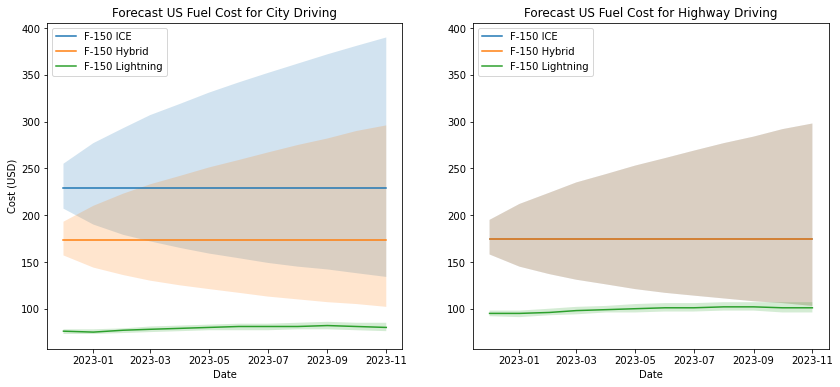

In [29]:
# Plots of monthly forecasted fuel costs for each vehicle

plt.subplots(figsize=(14,6))
ax1 = plt.subplot(121)
ax1.plot(car1_forecast_city['forecast'])
ax1.fill_between(car1_forecast_city.index, car1_forecast_city['low'], 
                 car1_forecast_city['high'], alpha=0.2)
ax1.plot(car2_forecast_city['forecast'])
ax1.fill_between(car2_forecast_city.index, car2_forecast_city['low'], 
                 car2_forecast_city['high'], alpha=0.2)
ax1.plot(car3_forecast_city['forecast'])
ax1.fill_between(car3_forecast_city.index, car3_forecast_city['low'], 
                 car3_forecast_city['high'], alpha=0.2)

ax1.set_xlabel('Date')
ax1.set_ylabel('Cost (USD)')
ax1.legend(['F-150 ICE', 'F-150 Hybrid', 'F-150 Lightning'], loc='upper left')
ax1.set_title('Forecast US Fuel Cost for City Driving')


ax2 = plt.subplot(122, sharey=ax1)
ax2.plot(car1_forecast_highway['forecast'])
ax2.fill_between(car1_forecast_highway.index, car1_forecast_highway['low'], 
                 car1_forecast_highway['high'], alpha=0.2)
ax2.plot(car2_forecast_highway['forecast'])
ax2.fill_between(car2_forecast_highway.index, car2_forecast_highway['low'], 
                 car2_forecast_highway['high'], alpha=0.2)
ax2.plot(car3_forecast_highway['forecast'])
ax2.fill_between(car3_forecast_highway.index, car3_forecast_highway['low'], 
                 car3_forecast_highway['high'], alpha=0.2)
ax2.set_xlabel('Date')
ax2.legend(['F-150 ICE', 'F-150 Hybrid', 'F-150 Lightning'], loc='upper left')
ax2.set_title('Forecast US Fuel Cost for Highway Driving');

In [30]:
# Forecasted total annual fuel costs for highway and city driving

car1_sum_city = car1_forecast_city.sum().astype(int)
car2_sum_city = car2_forecast_city.sum().astype(int)
car3_sum_city = car3_forecast_city.sum().astype(int)

totals_city = pd.DataFrame([car1_sum_city, car2_sum_city, car3_sum_city], 
                      index=['F-150', 'F-150 Hybrid', 'F-150 Lightning'])

car1_sum_highway = car1_forecast_highway.sum().astype(int)
car2_sum_highway = car2_forecast_highway.sum().astype(int)
car3_sum_highway = car3_forecast_highway.sum().astype(int)

totals_highway = pd.DataFrame([car1_sum_highway, car2_sum_highway, car3_sum_highway], 
                      index=['F-150', 'F-150 Hybrid', 'F-150 Lightning'])

In [31]:
totals_city

,forecast,low,high,co2
F-150,2748,1934,3981,5988
F-150 Hybrid,2088,1467,3021,5208
F-150 Lightning,951,911,990,0


In [32]:
totals_highway

,forecast,low,high,co2
F-150,2100,1477,3044,5988
F-150 Hybrid,2100,1477,3044,5208
F-150 Lightning,1191,1144,1246,0


In [33]:
# calculate how much more expensive fuel is for the gas-powered F-150 than the Lightning for city and highway driving
city_EV_gas_factor = (totals_city.loc['F-150']['forecast'] \
                      / totals_city.loc['F-150 Lightning']['forecast']).round(1)

highway_EV_gas_factor = (totals_highway.loc['F-150']['forecast'] \
                         / totals_highway.loc['F-150 Lightning']['forecast']).round(1)

In [34]:
# Forecasted total vehicle costs (MSRP + forecasted fuel costs) for highway and city driving

f150_cost_highway = car1_forecast_highway.drop('co2', axis=1).cumsum() \
+ msrp.loc['F-150']['price']
f150_hybrid_cost_highway = car2_forecast_highway.drop('co2', axis=1).cumsum() \
+ msrp.loc['F-150 Hybrid']['price']
lightning_standard_cost_highway = car3_forecast_highway.drop('co2', axis=1).cumsum() \
+ msrp.loc['F-150 Lightning']['price']


f150_cost_city = car1_forecast_city.drop('co2', axis=1).cumsum() \
+ msrp.loc['F-150']['price']
f150_hybrid_cost_city = car2_forecast_city.drop('co2', axis=1).cumsum() \
+ msrp.loc['F-150 Hybrid']['price']
lightning_standard_cost_city = car3_forecast_city.drop('co2', axis=1).cumsum() \
+ msrp.loc['F-150 Lightning']['price']

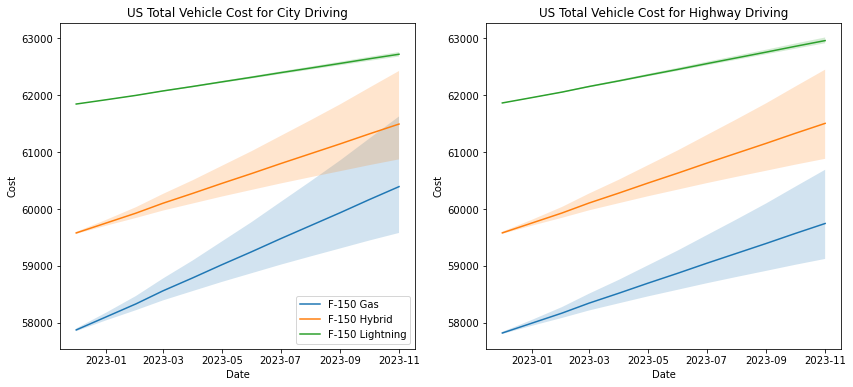

In [35]:
# Plots of forecasted total vehicle costs (MSRP + forecasted fuel costs) for highway and city driving

plt.subplots(figsize=(14,6))
ax1 = plt.subplot(121)
ax1.plot(f150_cost_city['forecast'])
ax1.fill_between(f150_cost_city.index, f150_cost_city['low'], f150_cost_city['high'], alpha=0.2)

ax1.plot(f150_hybrid_cost_city['forecast'])
ax1.fill_between(f150_hybrid_cost_city.index, f150_hybrid_cost_city['low'], 
                 f150_hybrid_cost_city['high'], alpha=0.2)

ax1.plot(lightning_standard_cost_city['forecast'])
ax1.fill_between(lightning_standard_cost_city.index, lightning_standard_cost_city['low'], 
                 lightning_standard_cost_city['high'], alpha=0.2)

ax1.legend(['F-150 Gas', 'F-150 Hybrid', 'F-150 Lightning'], loc='lower right')
ax1.set_title('US Total Vehicle Cost for City Driving')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cost')

ax2 = plt.subplot(122, sharey=ax1)
ax2.plot(f150_cost_highway['forecast'])
ax2.fill_between(f150_cost_highway.index, f150_cost_highway['low'], f150_cost_highway['high'], alpha=0.2)

ax2.plot(f150_hybrid_cost_highway['forecast'])
ax2.fill_between(f150_hybrid_cost_highway.index, f150_hybrid_cost_highway['low'], 
                 f150_hybrid_cost_highway['high'], alpha=0.2)

ax2.plot(lightning_standard_cost_highway['forecast'])
ax2.fill_between(lightning_standard_cost_highway.index, lightning_standard_cost_highway['low'], 
                 lightning_standard_cost_highway['high'], alpha=0.2)

ax2.set_title('US Total Vehicle Cost for Highway Driving')
ax2.set_xlabel('Date')
ax2.set_ylabel('Cost');

In [36]:
# annual fuel cost totals
fuel_totals_city = totals_city.drop('co2', axis=1)
fuel_totals_highway = totals_highway.drop('co2', axis=1)

In [37]:
def compare(fuel_totals):
    '''Function to calculate how long it would take for the total vehicle cost (MSRP + fuel costs) of the 
    gas-powered F-150 to overtake the costs of the F-150 lightning and F-150 hybrid.
    
    variables:
        fuel_totals (DataFrame): DataFrame of total annual forecasted fuel costs for each vehicle 
                                (fuel_totals_city or fuel_totals_highway).
                            
    Returns:
        df: returns two dataframes with the number of years it is forecast for the gas-powered F-150 to 
            cost more than the F-150 Lightning and the F-150 hybrid and the total vehicle costs for both vehicles 
            and the total fuel costs for both vehicles.
    '''

    temp_EV_gas = pd.DataFrame(index=['years', 'total EV cost', 'total ICE cost', 
                                         'EV fuel cost', 'ICE fuel cost'], 
                                 columns=[fuel_totals_city.columns])
    temp_hybrid_gas = pd.DataFrame(index=['years', 'total EV cost', 'total ICE cost', 
                                         'EV fuel cost', 'ICE fuel cost'], 
                                 columns=[fuel_totals_city.columns])

    for col in fuel_totals.columns:

        x1 = msrp.loc['F-150 Lightning']['price']
        x2 = msrp.loc['F-150 Hybrid']['price']
        y = msrp.loc['F-150']['price']
        cost_x1 = fuel_totals.loc['F-150 Lightning'][col]
        cost_x2 = fuel_totals.loc['F-150 Hybrid'][col]
        cost_y = fuel_totals.loc['F-150'][col]

        years_1 = 0
        if cost_x1 == cost_y:
            temp_EV_gas[col] = 'Fuel costs are the same'
        else: 
            while x1 > y:
                x1 = x1 + cost_x1
                y = y + cost_y
                years_1 += 1

                if x1 <= y:
                    temp_EV_gas.loc['years'][col] = years_1
                    temp_EV_gas.loc['total EV cost'][col] = x1
                    temp_EV_gas.loc['total ICE cost'][col] = y
                    temp_EV_gas.loc['EV fuel cost'][col] = cost_x1 * years_1
                    temp_EV_gas.loc['ICE fuel cost'][col] = cost_y * years_1

        y = msrp.loc['F-150']['price']
        years_2 = 0
        if cost_x2 == cost_y:
            temp_hybrid_gas[col] = 'Fuel costs are the same'
        else: 
            while x2 > y:
                x2 = x2 + cost_x2
                y = y + cost_y
                years_2 += 1

                if x2 <= y:
                    temp_hybrid_gas.loc['years'][col] = years_2
                    temp_hybrid_gas.loc['total EV cost'][col] = x2
                    temp_hybrid_gas.loc['total ICE cost'][col] = y
                    temp_hybrid_gas.loc['EV fuel cost'][col] = cost_x2 * years_2
                    temp_hybrid_gas.loc['ICE fuel cost'][col] = cost_y * years_2
                    
    return temp_EV_gas, temp_hybrid_gas

In [38]:
compare_EV_gas_city, compare_hybrid_gas_city = compare(fuel_totals_city)
compare_EV_gas_highway, compare_hybrid_gas_highway = compare(fuel_totals_highway)

In [39]:
compare_EV_gas_city

,forecast,low,high
years,3,5,2
total EV cost,64622,66324,63749
total ICE cost,65889,67315,65607
EV fuel cost,2853,4555,1980
ICE fuel cost,8244,9670,7962


In [40]:
compare_EV_gas_highway

,forecast,low,high
years,5,13,3
total EV cost,67724,76641,65507
total ICE cost,68145,76846,66777
EV fuel cost,5955,14872,3738
ICE fuel cost,10500,19201,9132


In [41]:
compare_hybrid_gas_city

,forecast,low,high
years,3,4,2
total EV cost,65669,65273,65447
total ICE cost,65889,65381,65607
EV fuel cost,6264,5868,6042
ICE fuel cost,8244,7736,7962


In [42]:
compare_hybrid_gas_highway

,forecast,low,high
years,Fuel costs are the same,Fuel costs are the same,Fuel costs are the same
total EV cost,Fuel costs are the same,Fuel costs are the same,Fuel costs are the same
total ICE cost,Fuel costs are the same,Fuel costs are the same,Fuel costs are the same
EV fuel cost,Fuel costs are the same,Fuel costs are the same,Fuel costs are the same
ICE fuel cost,Fuel costs are the same,Fuel costs are the same,Fuel costs are the same


In [43]:
city_EV_time_savings = compare_EV_gas_city.loc['years']['forecast']
highway_EV_time_savings = compare_EV_gas_highway.loc['years']['forecast']

md(f'''## Conclusions
Currently, electric vehicles generally have a higher MSRP than equivalent gas-powered vehicles. \
But they are also generally less expensive to own due to lower fuel costs and less \
maintenance (oil changes, etc.). This analysis shows that with only taking into account fuel costs, \
the overall cost of driving the standard 2022 Ford F-150 Lightning XLT would be less than the \
overall cost of driving the equivalent gas-powered 2022 Ford F-150 XLT in only \
**{city_EV_time_savings} to {highway_EV_time_savings} years** for 37 miles per day of city or highway \
driving, respectively based on the forecast fuel prices for the next 12 months. Fuel for the \
2022 Ford F-150 Lightning XLT would cost **{city_EV_gas_factor} to {highway_EV_gas_factor} times** \
less than the gas-powered 2022 Ford F-150 XLT. This is based on the EPA estimated fuel efficiency for \
these trucks, which due to various factors, can be different than what you might [experience]\
(https://www.fueleconomy.gov/feg/why_differ.shtml).

This analysis only takes into account fuel costs, there are other costs that will affect the overall cost\
of owning any vehicle. The [federal EV tax credit](https://www.fueleconomy.gov/feg/taxevb.shtml) \
of up to $7,500 for qualifying new EV purchases (the Ford F-150 Lightning still qualifies for \
the full amount), would make the EV version less than the gas-powered F-150 from the initial purchase. \
However, the cost of purchasing and installing an in-home level 2 charger could be \
several thousand dollars, which would increase the total cost of owning the EV version.

This analysis also did not take into account maintenace costs, which are generally higher in \
gas-powered vehicles than EVs, between [20]() and [50%](https://betterenergy.org/blog/consumer\
-reports-study-finds-electric-vehicle-maintenance-costs-are-50-less-than-gas-powered-cars/), \
again favoring EVs for lower overall cost of ownership. 

This analysis only gives an estimate of the total cost of ownership of these vehicles and is meant as \
a comparison among three similar trucks using typical driving distances and estimates of fuel efficiency \
and average fuel costs in the US. Actual costs of driving these vehicles will vary depending on driving \
style, fuel quality, where you drive, etc. 
''')

## Conclusions
Currently, electric vehicles generally have a higher MSRP than equivalent gas-powered vehicles. But they are also generally less expensive to own due to lower fuel costs and less maintenance (oil changes, etc.). This analysis shows that with only taking into account fuel costs, the overall cost of driving the standard 2022 Ford F-150 Lightning XLT would be less than the overall cost of driving the equivalent gas-powered 2022 Ford F-150 XLT in only **3 to 5 years** for 37 miles per day of city or highway driving, respectively based on the forecast fuel prices for the next 12 months. Fuel for the 2022 Ford F-150 Lightning XLT would cost **2.9 to 1.8 times** less than the gas-powered 2022 Ford F-150 XLT. This is based on the EPA estimated fuel efficiency for these trucks, which due to various factors, can be different than what you might [experience](https://www.fueleconomy.gov/feg/why_differ.shtml).

This analysis only takes into account fuel costs, there are other costs that will affect the overall costof owning any vehicle. The [federal EV tax credit](https://www.fueleconomy.gov/feg/taxevb.shtml) of up to $7,500 for qualifying new EV purchases (the Ford F-150 Lightning still qualifies for the full amount), would make the EV version less than the gas-powered F-150 from the initial purchase. However, the cost of purchasing and installing an in-home level 2 charger could be several thousand dollars, which would increase the total cost of owning the EV version.

This analysis also did not take into account maintenace costs, which are generally higher in gas-powered vehicles than EVs, between [20]() and [50%](https://betterenergy.org/blog/consumer-reports-study-finds-electric-vehicle-maintenance-costs-are-50-less-than-gas-powered-cars/), again favoring EVs for lower overall cost of ownership. 

This analysis only gives an estimate of the total cost of ownership of these vehicles and is meant as a comparison among three similar trucks using typical driving distances and estimates of fuel efficiency and average fuel costs in the US. Actual costs of driving these vehicles will vary depending on driving style, fuel quality, where you drive, etc. 
